## 线性回归 - Linear Regression

In [72]:
import numpy as np
import pandas as pd
from sklearn import datasets #sklearn提供了很多学习的数据集
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import classification_report#这个包是评价报告

In [68]:
class LinearRegression():
    def __init__(self):
        self.w = None
        
    def fit(self, X, y):
        # Insert constant ones for bias weights
        print(X.shape)
        X = np.insert(X, 0, 1, axis=1)
        print(X.shape)
        X_ = np.linalg.inv(X.T.dot(X))
        self.w = X_.dot(X.T).dot(y)
        print(self.w.shape)
    
    def predict(self, X):
        # Insect constant ones for bias weights
        print(X.shape)
        X = np.insert(X, 0, 1, axis=1)
        print(X.shape)
        y_pred = X.dot(self.w)
        return y_pred

In [69]:
def mean_squared_error(y_true, y_pred):
    mse = np.mean(np.power(y_true - y_pred, 2))
#     mse = np.sum(np.power(y_true - y_pred, 2))
#     mse = mse/20
    return mse

In [70]:
def main():
    # Load the diabetes dataset
    diabetes = datasets.load_diabetes()
#     print(diabetes.data)
#     print(diabetes.target)
    
    # Use only one feature
    X = diabetes.data[:, np.newaxis, 2]
#     print(X.shape)
#     print(X)
    
    # Split the data into training/testing sets
    x_train, x_test = X[:-20], X[-20:]
    
    # Split the targets into training/testing sets
    y_train, y_test = diabetes.target[:-20], diabetes.target[-20:]
    
    clf = LinearRegression()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
#     print(y_pred)

    # Print the mean squared error
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    
    # Plot the results
    plt.scatter(x_test[:, 0], y_test, color='black')
    plt.plot(x_test[:, 0], y_pred, color='blue', Linewidth=3)
    plt.show()

(422, 1)
(422, 2)
(2,)
(20, 1)
(20, 2)
Mean Squared Error: 2548.07239873


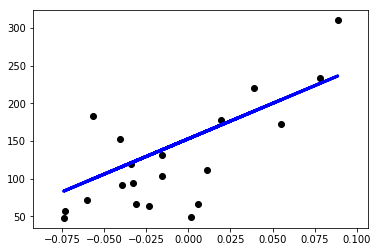

In [71]:
main()

## 逻辑回归 - Logistic Regression - 二分类

In [76]:
data = pd.read_csv('G:/LearningData/ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head() #看前五行

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [77]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


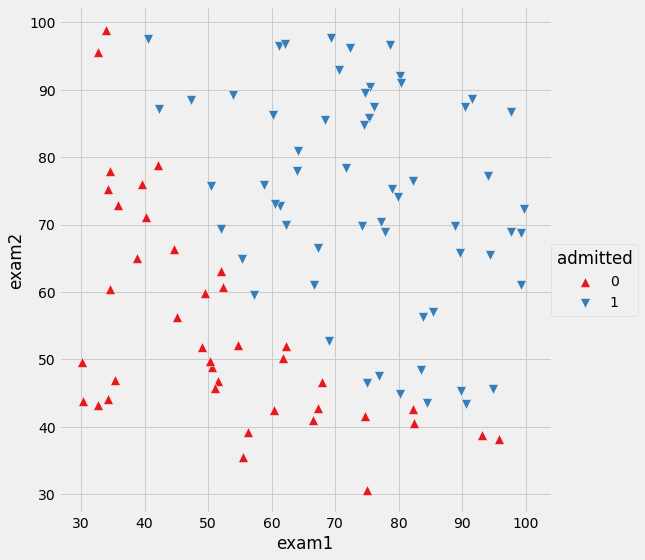

In [78]:
g = sns.FacetGrid(data, hue='admitted', palette='Set1', size=8, hue_kws={'marker': ["^", "v"]})
g.map(plt.scatter, 'exam1', 'exam2', s=100, linewidth=.5, edgecolor='white')
g.add_legend()
plt.show()

In [114]:
def get_X(df):
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)
#     print(data.iloc[:, :-1])
    return data.iloc[:, :-1].as_matrix()

def get_Y(df):
#     return np.array(df.iloc[:, -1])
    return df.iloc[:, -1].as_matrix()

def normalize_feature(df):
    return df.apply(lambda column:(column - column.mean())/column.std())

In [123]:
X = get_X(data)
print(X.shape)

y = get_y(data)
# print(y)
print(y.shape)

(100, 3)
(100,)


In [124]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

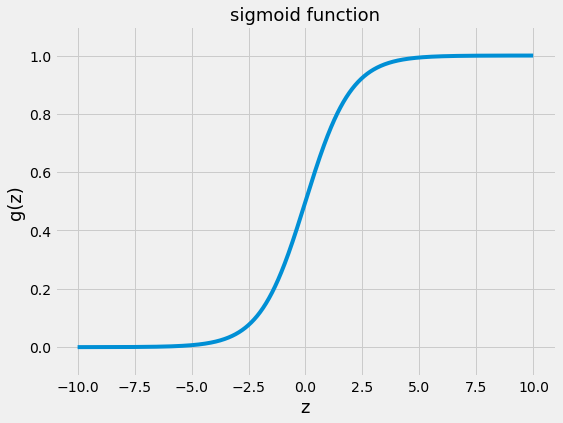

In [125]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(-10, 10, step=0.01),
        sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

$$\begin{align}
  &J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
\end{align}$$

In [126]:
theta = np.zeros(3)
theta

array([ 0.,  0.,  0.])

In [133]:
def cost(theta, X, y):
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta))) # X @ theta与X.dot(theta)等价

In [134]:
# sigmoid((X @ theta)).shape
cost(theta, X, y)

0.69314718055994529

## gradient descent(梯度下降)
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [135]:
def gradient(theta, X, y):
    return (1/len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [140]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [141]:
import scipy.optimize as opt

In [143]:
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)

In [144]:
print(res)

     fun: 0.20349770172083584
     jac: array([  1.98942032e-06,   1.34698328e-04,   1.47259166e-04])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 30
    njev: 270
  status: 0
 success: True
       x: array([-25.16227358,   0.20623923,   0.20147921])


## 用训练集预测和验证

In [145]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [159]:
final_theta = res.x
y_pred = predict(X, final_theta)

target_names = ['0', '1']
print(classification_report(y, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.87      0.85      0.86        40
          1       0.90      0.92      0.91        60

avg / total       0.89      0.89      0.89       100



In [157]:
print(y[y == 0].size)

40


## 寻找决策边界
> $X^{T}\theta = 0$  (this is the line)

In [160]:
print(final_theta)

[-25.16227358   0.20623923   0.20147921]


In [163]:
coef = -(final_theta/final_theta[2])
print(coef)

x = np.arange(0, 130, step=0.1)
y = coef[0] + coef[1]*x

[ 124.88769463   -1.0236254    -1.        ]


> you know the intercept would be around 125 for both x and y

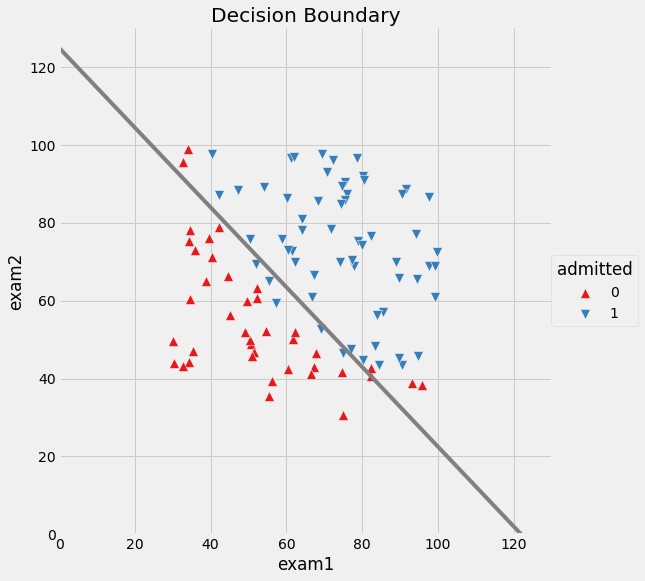

In [164]:
g = sns.FacetGrid(data, hue='admitted', palette='Set1', size=8, hue_kws={'marker': ["^", "v"]})
g.map(plt.scatter, 'exam1', 'exam2', s=100, linewidth=.5, edgecolor='white')
g.add_legend()

plt.plot(x, y, 'grey')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title('Decision Boundary')
plt.show()